In [11]:
 !pip install wordcloud

In [17]:
df = pd.read_csv(r'C:\Users\Ayushi mishra\Downloads\archive (2)\fake_or_real_news.csv')
print(df)

      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinter

Final Dataset Size: (6335, 3)


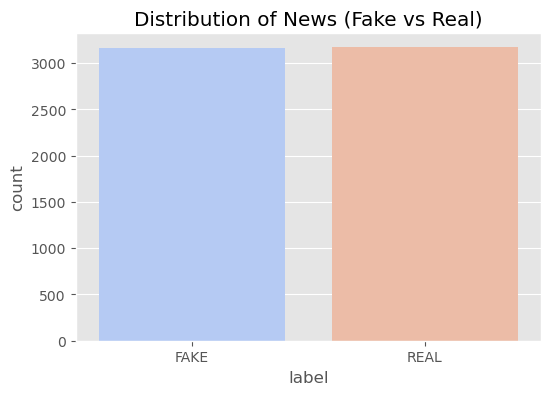

Generating Word Cloud... (this might take a moment)


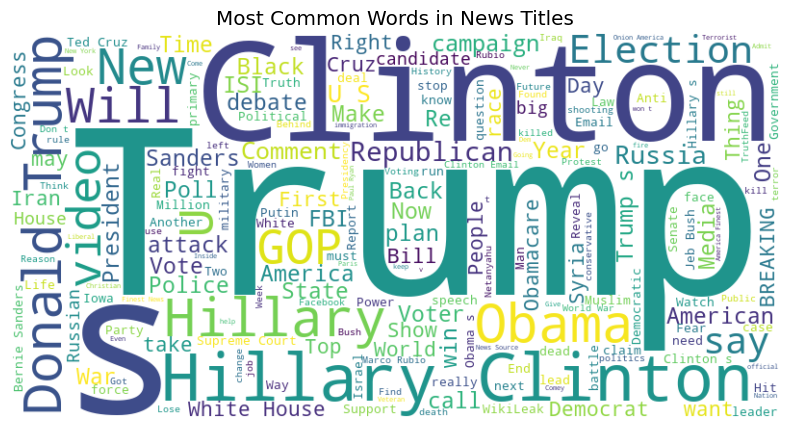

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

print(f"Final Dataset Size: {df.shape}")

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, hue='label', palette='coolwarm', legend=False)
plt.title('Distribution of News (Fake vs Real)')
plt.show()

print("Generating Word Cloud... (this might take a moment)")
all_titles = " ".join(title for title in df.title)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # Turn off axis numbers
plt.title('Most Common Words in News Titles')
plt.show()


Model Accuracy: 92.19%


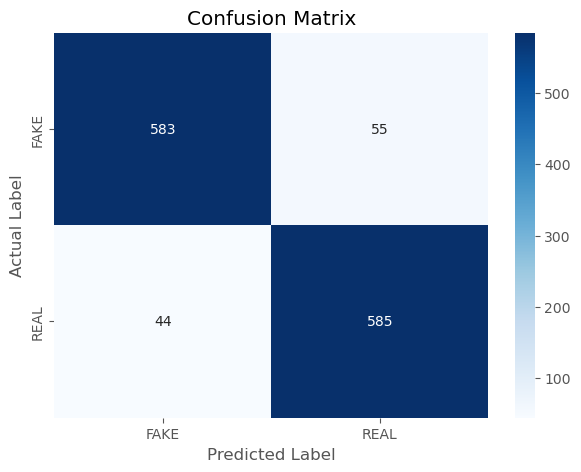

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df['content'] = df['title'] + " " + df['text']

X = df['content']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train) 
tfidf_test = vectorizer.transform(X_test)

pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

y_pred = pac.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\n Model Accuracy: {round(accuracy*100, 2)}%')

cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



In [25]:
def predict_news(news_text):
    vec_text = vectorizer.transform([news_text])
    prediction = pac.predict(vec_text)[0]
    
    if prediction == "FAKE":
        return " FAKE NEWS DETECTED"
    else:
        return "REAL NEWS"

print("System Ready! Running Tests...")

print("\n--- TEST 1: REAL NEWS EXAMPLES ---")

real_1 = "Obama signs executive order regarding immigration policy reform."
print(f"Input: {real_1}\nResult: {predict_news(real_1)}\n")

real_2 = "FBI director Comey testifies before Congress about ongoing investigation."
print(f"Input: {real_2}\nResult: {predict_news(real_2)}\n")

real_3 = "Senate majority leader Mitch McConnell blocks vote on supreme court nominee."
print(f"Input: {real_3}\nResult: {predict_news(real_3)}\n")


print("\n--- TEST 2: FAKE NEWS EXAMPLES ---")

fake_1 = "Pope Francis shocks world, endorses Donald Trump for President."
print(f"Input: {fake_1}\nResult: {predict_news(fake_1)}\n")

fake_2 = "Hillary Clinton actually died 3 years ago and was replaced by a clone."
print(f"Input: {fake_2}\nResult: {predict_news(fake_2)}\n")

System Ready! Running Tests...

--- TEST 1: REAL NEWS EXAMPLES ---
Input: Obama signs executive order regarding immigration policy reform.
Result: REAL NEWS

Input: FBI director Comey testifies before Congress about ongoing investigation.
Result:  FAKE NEWS DETECTED

Input: Senate majority leader Mitch McConnell blocks vote on supreme court nominee.
Result: REAL NEWS


--- TEST 2: FAKE NEWS EXAMPLES ---
Input: Pope Francis shocks world, endorses Donald Trump for President.
Result: REAL NEWS

Input: Hillary Clinton actually died 3 years ago and was replaced by a clone.
Result:  FAKE NEWS DETECTED



In [26]:
import pickle
print("Saving model to disk...")
with open('fake_news_model.pkl', 'wb') as f:
    pickle.dump(pac, f)
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print(" Success! Files 'fake_news_model.pkl' and 'tfidf_vectorizer.pkl' created.")


Saving model to disk...
 Success! Files 'fake_news_model.pkl' and 'tfidf_vectorizer.pkl' created.
You can now close this notebook and your model is safe.
